# Modelo de Prueba 
Se comenzará realizando un modelo de prueba. Se utilizará la proyección proveniente de una elipse cuando los rayos que la atraviesan son paralelos, Posteriormente, se procede a calcular la retroproyección filtrada basada en esta proyección.

### Pasos para la Retroproyección Filtrada:  
1. Calcular la proyección $P_\theta (t)$.   
2. Realizar la retroproyección $S_\theta (w)$, básicamente la transformada de Fourier de $P_\theta (t)$. 
3. Hacer la retroproyección filtrada $Q_\theta (t)$. 
4. Calcular $f(x,y)$.
5. Obtener la representación gráfica de la retroproyección filtrada. 

#### 1. Calculo de la proyección  
Para obtener una proyección [1] $P_\theta(t)$ de una elipse de forma sencilla, se utiliza la siguiente fórmula, tomada de [1]:

$P_\theta(t)$ = $\frac{2\rho AB}{a^2(\theta)} \sqrt{a^2(\theta) - t^2}$, 


donde: 

$a^2(\theta)= A^2 cos^2\theta + B^2sen^2\theta$ 

y 

$\rho = 1$ si $t<a(\theta)$.

Aquí, A es el semi Eje mayor, B es el semi eje menor y $\theta$ es el ángulo con respecto al eje x. Con *$\rho$=1 para $\frac{x^2}{A^2} + \frac{y^2}{B^2}$ ≤ 1 y $0$ fuera de esta.* 




In [1]:
#Librerias 
import numpy as np 
import math
import cmath
import matplotlib.pyplot as plt 

In [2]:
#Función para obtener la proyección P_\theta, donde q es theta y a_q representa a^2(\theta).
def P(A,B,q,t=[]):
    a_q=((A**2)*((np.cos(np.radians(q)))**2)) + ((B**2)*((np.sin(np.radians(q)))**2))
    return ([(2*A*B)/(a_q)*np.sqrt(a_q-(tt**2)) if a_q-(tt**2)>0 else 0.0 for tt in t])

In [11]:
## Definición de los parámetros de la elipse
A=0.65 #Semi eje mayor
B=0.35 #Semi eje menor

#Numero de proyecciones
v= 10
q_i=[]
for i in range(v): 
    q_i.append(int(i*(180/v)))
    
#Valor de tao 
tao=0.01

#Número de muestras
N=200

# Valores de t
ts=np.arange(-1.0,1.01,tao)

# Cálculo de omegas para el filtrado en el dominio de Fourier
omegas=np.arange(-N/(4.0),N/(4.0),0.5)


Se obtiene $P_{\theta_i}$ para cada $\theta$, de [-1,1] en intervalos de $\tau$.

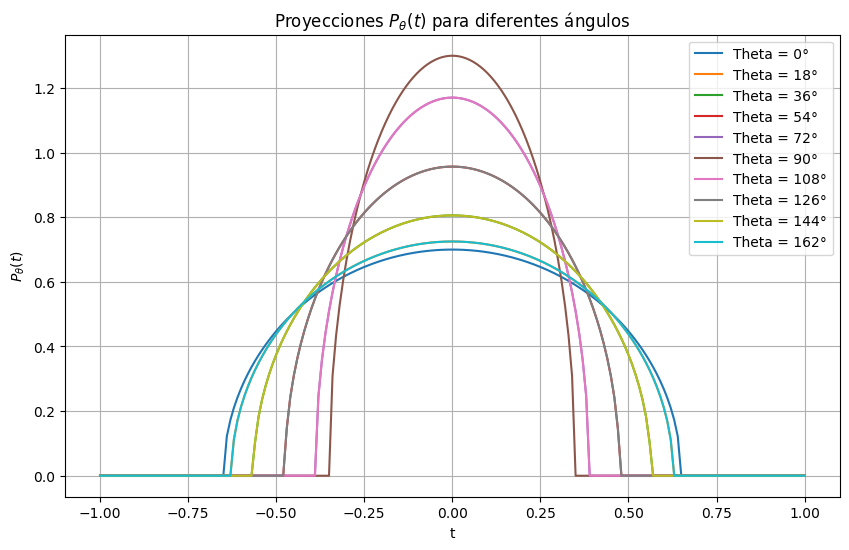

In [15]:
# Cálculo de P_theta para cada theta
P_thetas = {q: P(A, B, q, ts) for q in q_i}

# Graficar las proyecciones
plt.figure(figsize=(10, 6))
for q in q_i:
    plt.plot(ts, P_thetas[q], label=f'Theta = {q}°')
plt.xlabel('t')
plt.ylabel('$P_\\theta(t)$')
plt.title('Proyecciones $P_\\theta(t)$ para diferentes ángulos')
plt.legend()
plt.grid(True)
plt.show()

#### 2. Retroproyección $S_\theta (w)$
Se obtiene la transformada de Fourier de las proyecciones paralelas  $S_\theta (w)$ en el dominio de frecuencias en función del número de muestras (N) y $P_\theta(t)$ (P_q). 

In [11]:
#Lista que contiene S_theta para cada t a un determinado ángulo. 
S_qi=[]
for q in q_i:
    #Lista que contiene S_{theta_i}(w)
    S_qk=[]
    for k in omegas:
        Sqk=tao*sum(np.multiply(P(A,B,q,ts),np.exp(-2*np.pi*(((ts*k)))*1j)))
        S_qk.append(Sqk)
    S_qi.append(S_qk)

#### 3. Retroproyección Filtrada $Q_\theta (t)$
La retroproyección filtrada $Q_\theta (t)$ se obtiene en función del número de muestras (N), y la transformada de la proyección $S_\theta (w)$.

In [12]:
# Lista que contiene Q_theta(t) para cada ángulo
Q_qt=[]
for k in range(len(q_i)):
    Qxyt=[]
    #print(q_i[k])
    for xx in ts:
        Qyt=[]
        for yy in ts:
            Q_q=0
            t=xx*np.cos(q_i[k]*np.pi/180)+yy*np.sin(q_i[k]*np.pi/180)
            Q_q=(1/(tao*N))*sum(np.multiply(np.multiply(S_qi[k],
                np.exp(2*np.pi*omegas*t*1j)),abs(omegas)))
            Qyt.append(Q_q)
        Qxyt.append(Qyt)
    Q_qt.append(Qxyt)

#### 4. **$f(x,y)$** 
La funcion final es la sumatoria de todas las retroproyecciones filtradas $Q_{\theta_i}(t)$.

In [13]:
#Lista que contendrá la función final f(x,y)
Qxy=[]
for xx in range(len(np.arange(-1.0,1.0,tao))):
    Qy=[]
    for yy in range(len(np.arange(-1.0,1.0,tao))):
        Q=0
         # Suma de todas las retroproyecciones filtradas
        for l in range(len(q_i)):
            Q+=(np.pi/len(q_i))*Q_qt[l][yy][xx]
        Qy.append(Q)
    Qxy.append(Qy)

### 5. Representación gráfica de la retroproyección filtrada. 
Finalmente, se representa gráficamente la imagen obtenida mediante la retroproyección filtrada.

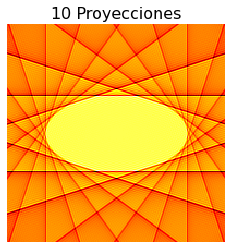

In [14]:
# Convertir la lista Qxy a un array de NumPy y tomar la parte real
F=np.array(Qxy).real

# Representación gráfica utilizando Matplotlib
plt.imshow((F), cmap='hot', interpolation='nearest')
plt.axis('off')
plt.title(str(v)+" Proyecciones", size = 16,)
plt.show()

Este código calcula la función final $f(x,y)$ sumando todas las retroproyecciones filtradas para cada combinación de 
x y y. Esta función final representa la imagen reconstruida a partir de las proyecciones paralelas utilizando la técnica de retroproyección filtrada.